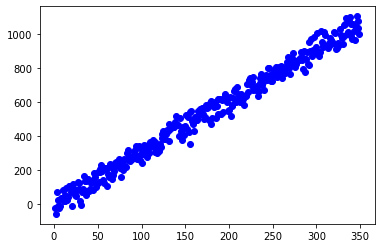

In [18]:
#Home assignment 4: Use the same noisy line dataset generated in Home assignment 3 and detect line with Hough Transform
#- Use the same noisy line dataset generated in Home assignment 3
#- Create a code in Python (or use an existing library) that detects the line parameters using Hough Transform
#- Visualize the results for line detection with Hough Transform
#- Compare the line detection with Hough Transform and RANSAC
import numpy as np
import sys
import math
import cv2 as cv
from skimage.measure import LineModelND
from skimage.measure import ransac
import matplotlib.pyplot as plt



N = 350
a = 3
b = 8
x = np.arange(1, N, 1)
y = a * x + b
noise = 40*np.random.normal(size= x.size) 
y_noise = noise + y

plt.plot(x, y_noise, "bo")
plt.savefig('data.png')
plt.show()


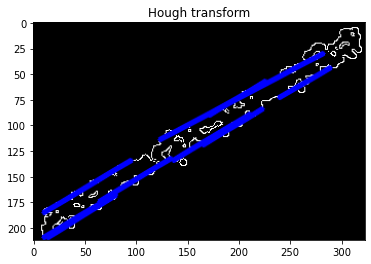

0

In [34]:
import sys
import math
import cv2 as cv
import numpy as np

def main():
    
    default_file = 'data.png'
    
    # Loads an image
    src = cv.imread(cv.samples.findFile(default_file), cv.IMREAD_GRAYSCALE)

    gray_image = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)
    linesP = cv.HoughLinesP(gray_image, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    plt.imshow(cdst)
    plt.title("Hough transform")
    plt.show()
    
    cv.waitKey()
    return 0
    
main()